In [1]:
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import utils

# Warning suppression
import warnings
from sklearn.exceptions import ConvergenceWarning

In [2]:
df = pd.read_csv('data/diabetes_binary_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
X = df.copy().drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary'].copy()
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Diabetes_binary, dtype: float64

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [5]:
rfm = utils.create_model(utils.Model.RANDOM_FOREST, {})
rfm.fit(X_train, y_train)
pred = rfm.predict(X_test)
y_test.head()


211209    1.0
239871    0.0
107521    0.0
228983    0.0
152743    0.0
Name: Diabetes_binary, dtype: float64

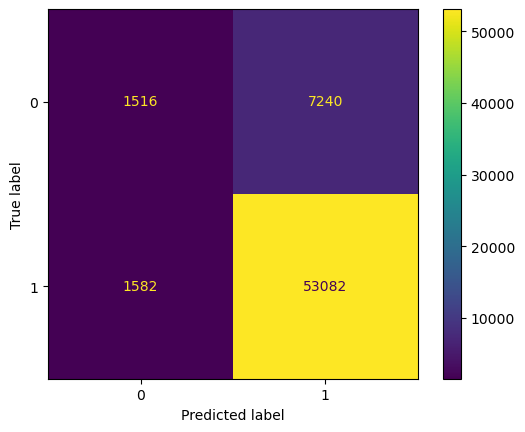

In [6]:
cmd = utils.confusion_matrix_plot(y_test, pred, [1, 0])
cmd.plot()

In [7]:
print(classification_report(y_test,
                            pred,
                            target_names=["negative", "positive"]))

              precision    recall  f1-score   support

    negative       0.88      0.97      0.92     54664
    positive       0.49      0.17      0.26      8756

    accuracy                           0.86     63420
   macro avg       0.68      0.57      0.59     63420
weighted avg       0.83      0.86      0.83     63420



In [8]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score

print(accuracy_score(y_test, pred))
print(balanced_accuracy_score(y_test, pred))

0.8608956165247555
0.57209899162537


In [9]:
models = [
    [
    #     'Logistic Regression',
    #     utils.create_model(
    #         utils.Model.LOGISTIC_REGRESSION,
    #         {'max_iter': 100, 'random_state': 42}
    #     )
    # ], [
    #     'SVC Linear',
    #     utils.create_model(
    #         utils.Model.SVC,
    #         {'kernel': 'linear', 'random_state': 42}
    #     )
    # ], [
    #     'SVC Poly',
    #     utils.create_model(
    #         utils.Model.SVC,
    #         {'kernel': 'poly', 'random_state': 42}
    #     )
    # ], [
    #     'Decision Tree',
    #     utils.create_model(
    #         utils.Model.DECISION_TREE,
    #         {'random_state': 42}
    #     )
    # ], [
        'Random Forest',
        utils.create_model(
            utils.Model.RANDOM_FOREST,
            {'n_estimators': 128, 'random_state': 42}
        )
    ], [
        'KNN',
        utils.create_model(
            utils.Model.KNN,
            {'n_neighbors': 5}
        )
    ]
]

In [10]:
# Check balanced scores for base model

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=ConvergenceWarning)
    results = utils.test_models(
        models, X_train, X_test, y_train, y_test)
    display(results[['name', 'train_score', 'score', 'balanced_score']])

# 	name	train_score	score	balanced_score
# 0	Random Forest	0.994597	0.860896	0.571140
# 1	KNN	0.885252	0.849133	0.573524

,name,train_score,score,balanced_score
0,Random Forest,0.994597,0.860896,0.571140
1,KNN,0.885252,0.849133,0.573524
